### FALL 2020 -> CSE 6363 -> Machine Learning
## Project Title :- Personality Prediction of People Based on Social Media Posts


---






**Summary :-** The aim of this project is to build a system that helps in predicting individual's personality.

1.   Myers- Briggs Type Indicator (MBTI) is used to classify each indivdual into   different personality traits such as Introversion-Extroversion(I-E), iNtuition-Sensing(N-S), Feeling-Thinking(F-T) and Judging-Perceiving(J-P).
2.   Understanding the data from df, It has two columns with Indicator 'type' and the related'posts'
3.   Posts are used input and we need to predict the Indicator for the given posts
4. Start with preprocessing the input document,we need clean the Posts which includes removing stopwords, deleting the links, punctuation's, converting to lower.
5. We need to create seperate columns for each binary indicators of IE,NS,TF,JP
6. Visual the Ouput labels w.r.t each indicator
7. We can undertsand that Data is highly imbalanced in case of IE and NS, So we need to trying resampling methods 
8. Use Count Vectorizer to convert into numbers using frequency of each word in the list, and using Tfidf vectorizer convert to term ferquency matrix .
8. Lets start predicting by using classifier Logistic Regression, Decision Tree,RandomForest Classifier, Multinomial naive bayes classifier and XG Boost Classifier.
9. Looking at the classification reports, RandomForest Classifier performed better than other models.
10. Lets try resampling using Smote, Near Miss And RandomOversampling technique's
11. Suprisingly resampling haven't improved performance of the model
12. Summary of the Project and future scope of it



In [7]:
#For Importing dataset.

from google.colab import files
uploaded = files.upload()

Saving mbti_1.csv to mbti_1.csv


In [8]:
# Importing the necessary libraries

import numpy as np
import pandas as pd

#nltk libraries
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt') # one time execution
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


#Vecorizer Count and TFIDF
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE


#read the dataset
import re
import io
df = pd.read_csv("mbti_1.csv")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
# Importing the necessary libraries

#plottinglibraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import plotly.offline as py
import plotly.graph_objs as go
import scipy.stats as stats
import string

#ClassificationModels
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

#Classification Report and Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

#Training and Test data split
from sklearn.model_selection import train_test_split, GridSearchCV

#
!pip install imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



**Data Visualization**

In [14]:
#top 5 rows of the dataframe
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [15]:
#Rows and Columns of df
df.shape

(8675, 2)

In [16]:
#Looking the dataset info to look for any null values in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [17]:
#unique values in Type and posts
df.nunique()

type       16
posts    8675
dtype: int64

In [18]:
#looking into Classification of type indicators (highly Imbalanced dataset)
df.type.value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

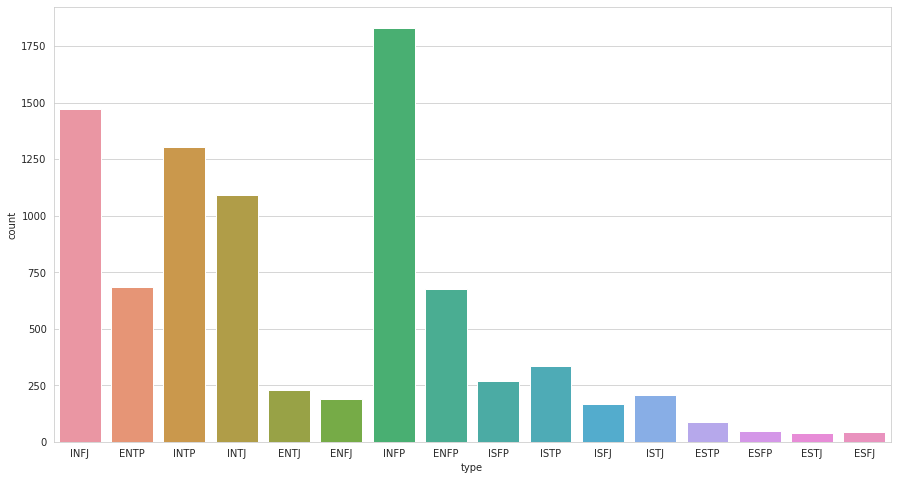

In [19]:
#visualize dataset type using snsplot
plt.figure(figsize = (15,8))
sns.countplot(x='type' , data = df)

In [20]:
#same plots to get better idea using pie charts

cnt = df.groupby(['type'])['posts'].count()
pie = go.Pie(labels=cnt.index, values=cnt.values)
fig = go.Figure(data=[pie])
py.iplot(fig)

In [21]:
#looking into first row of the posts to get idea of what preprocessing has to be done to make it clean text
df.iloc[0,1].split('|||')

["'http://www.youtube.com/watch?v=qsXHcwe3krw",
 'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
 'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
 'What has been the most life-changing experience in your life?',
 'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
 'May the PerC Experience immerse you.',
 'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
 "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
 '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-ho

**Data Preprocessing**

In [22]:
#Preprocessing Funtion to Process posts column and give Clean text from that

def preprocess_text(df, remove_special=True):
    #Remove links 
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))
    
    #Keep EOS
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'\.', ' EOSTokenDot ', x + " "))
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'\?', ' EOSTokenQuest ', x + " "))
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'!', ' EOSTokenExs ', x + " "))
    
    #Strip Punctation
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^\w\s]','',x))

    #Remove Non-words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))

    #To lower
    df["posts"] = df["posts"].apply(lambda x: x.lower())

    #Remove multiple letter repating words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 

    #Remove short/long words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x)) 
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))

    #Remove Personality Types Words
    #This is crutial in order to get valid model accuracy estimation for unseen data. 
    if remove_special:
        pers_types = ['INFP' ,'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP', 'ISTP' ,'ISFP' ,'ENTJ', 'ISTJ','ENFJ', 'ISFJ' ,'ESTP', 'ESFP' ,'ESFJ' ,'ESTJ']
        pers_types = [p.lower() for p in pers_types]
        p = re.compile("(" + "|".join(pers_types) + ")")

    df["posts"] = df["posts"].apply(lambda x: p.sub(' PTypeToken ',x))
    return df


In [23]:
#Preprocessing the Posts 
Cleaned_df = preprocess_text(df)
Cleaned_df

,type,posts
0,INFJ,PTypeToken PTypeToken moments sport...
1,ENTP,finding lack these posts very alarming eo...
2,INTP,good course which know thats bles...
3,INTJ,dear PTypeToken enjoyed conversation ot...
4,ENTJ,youre fired eostokendot thats another silly...
...,...,...
8670,ISFP,ixfp just because always think cats doms...
8671,ENFP,eostokendot eostokendot eostokendot this t...
8672,INTP,many questions when these things eostokendo...
8673,INFP,very conflicted right when comes wanting ...


In [24]:
#Relooking into first row of the posts to see preprocessed text
Cleaned_df.iloc[0,1]

'     PTypeToken    PTypeToken  moments   sportscenter    plays   pranks   what  been  most lifechanging experience  your life eostokenquest        repeat  most  today eostokendot      perc experience immerse  eostokendot     last thing   PTypeToken  friend posted   facebook before committing suicide  next  eostokendot  rest  peace     hello  PTypeToken  eostokendot  sorry  hear  your distress eostokendot   only natural   relationship    perfection   time  every moment  existence eostokendot    figure  hard times  times  growth  eostokendot  eostokendot  eostokendot          eostokendot  eostokendot  eostokendot    welcome  stuff eostokendot     game eostokendot   eostokendot  match eostokendot    prozac wellbrutin  least thirty minutes  moving your legs   dont mean moving them while sitting  your same desk chair weed  moderation maybe  edibles   healthier alternative eostokendot  eostokendot  eostokendot    basically come  with three items youve determined that each type  whichever ty

In [25]:
# Create a copy of the Preprocessed dataframe
df_copy = Cleaned_df.copy()
df_copy.head()

,type,posts
0,INFJ,PTypeToken PTypeToken moments sport...
1,ENTP,finding lack these posts very alarming eo...
2,INTP,good course which know thats bles...
3,INTJ,dear PTypeToken enjoyed conversation ot...
4,ENTJ,youre fired eostokendot thats another silly...


**Feature Selection**

In [26]:
# Create a binary column for each of the 4 axis types

df_copy['IE'] = df_copy['type'].map(lambda x: '0' if x[0] == 'I' else '1')
df_copy['NS'] = df_copy['type'].map(lambda x: '0' if x[1] == 'N' else '1')
df_copy['TF'] = df_copy['type'].map(lambda x: '0' if x[2] == 'T' else '1')
df_copy['JP'] = df_copy['type'].map(lambda x: '0' if x[3] == 'J' else '1')

df_copy.head()

,type,posts,IE,NS,TF,JP
0,INFJ,PTypeToken PTypeToken moments sport...,0,0,1,0
1,ENTP,finding lack these posts very alarming eo...,1,0,0,1
2,INTP,good course which know thats bles...,0,0,0,1
3,INTJ,dear PTypeToken enjoyed conversation ot...,0,0,0,0
4,ENTJ,youre fired eostokendot thats another silly...,1,0,0,0


In [27]:
#Getting the values of each type of the indincators

print ("Introversion (I) /  Extroversion (E):\t", df_copy['IE'].value_counts()[0], " / ", df_copy['IE'].value_counts()[1])
print ("Intuition (N) – Sensing (S):\t\t", df_copy['NS'].value_counts()[0], " / ", df_copy['NS'].value_counts()[1])
print ("Thinking (T) – Feeling (F):\t\t", df_copy['TF'].value_counts()[0], " / ", df_copy['TF'].value_counts()[1])
print ("Judging (J) – Perceiving (P):\t\t", df_copy['JP'].value_counts()[0], " / ", df_copy['JP'].value_counts()[1])

Introversion (I) /  Extroversion (E):	 6676  /  1999
Intuition (N) – Sensing (S):		 7478  /  1197
Thinking (T) – Feeling (F):		 4694  /  3981
Judging (J) – Perceiving (P):		 5241  /  3434


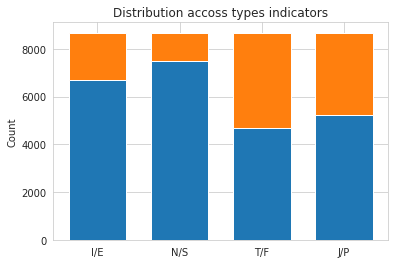

In [28]:
#Visually Plotting each type Indicator(IE an NS are highly imbalanced)
N = 4
bot = (df_copy['IE'].value_counts()[0], df_copy['NS'].value_counts()[0], df_copy['TF'].value_counts()[0], df_copy['JP'].value_counts()[0])
top = (df_copy['IE'].value_counts()[1], df_copy['NS'].value_counts()[1], df_copy['TF'].value_counts()[1], df_copy['JP'].value_counts()[1])

ind = np.arange(N)    # the x locations for the groups
width = 0.7      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, bot, width)
p2 = plt.bar(ind, top, width, bottom=bot)

plt.ylabel('Count')
plt.title('Distribution accoss types indicators')
plt.xticks(ind, ('I/E',  'N/S', 'T/F', 'J/P',))

plt.show()

In [29]:
#Creating Type labels array of values

IE= df_copy.iloc[:, 2].values
NS= df_copy.iloc[:, 3].values
TF=df_copy.iloc[:, 4].values
JP=df_copy.iloc[:, 5].values

In [30]:
##let us get the features for our training texts with count vectorizer
cv = CountVectorizer(max_features =2000)
features = cv.fit_transform(df_copy['posts']).toarray()

In [31]:
X_train, X_test, IE_train, IE_test, NS_train, NS_test, TF_train, TF_test, JP_train, JP_test = train_test_split(features, IE,NS,TF,JP, test_size = 0.20, random_state = 42)

In [32]:
#function to display confusion matrix
LABELS = ["No","Yes"]
import seaborn as sns
def draw_matrix(conf_matrix, LABELS):
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, xticklabels=LABELS,
                yticklabels=LABELS, annot=True, fmt="f");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()


**Applying different classification techniques :-**
1.   All the data preprocessing is done and now need predict the accuracy of models 
2.   I took 5 models and calculated the accuracy score using classification report for Every Indicators indiviudually of all the 5 models



**Logistic Regression**

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



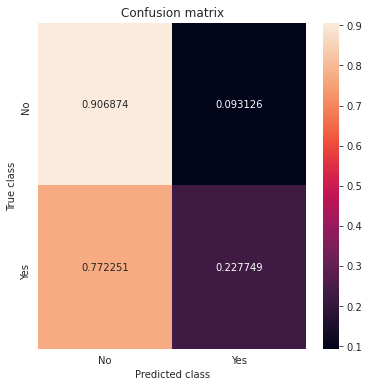

              precision    recall  f1-score   support

           0       0.81      0.91      0.85      1353
           1       0.41      0.23      0.29       382

    accuracy                           0.76      1735
   macro avg       0.61      0.57      0.57      1735
weighted avg       0.72      0.76      0.73      1735



In [33]:
#Logistic Regression Model FOR I_E Indicator has accuracy of 76%

IEB = LogisticRegression()
IEB.fit(X_train,IE_train)
IEB_pred = IEB.predict(X_test)
matrix = confusion_matrix(IE_test, IEB_pred, normalize = 'true')


draw_matrix(matrix, LABELS)
print(classification_report(IE_test, IEB_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



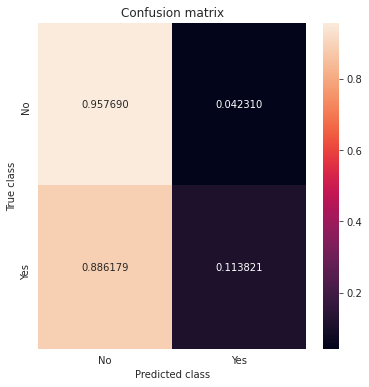

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1489
           1       0.31      0.11      0.17       246

    accuracy                           0.84      1735
   macro avg       0.59      0.54      0.54      1735
weighted avg       0.79      0.84      0.80      1735



In [25]:
#Logistic Regression Model FOR N_S Indicator has accuracy of 84%

NSB = LogisticRegression()
NSB.fit(X_train,NS_train)
NSB_pred = NSB.predict(X_test)
matrix = confusion_matrix(NS_test, NSB_pred, normalize = 'true')


draw_matrix(matrix, LABELS)
print(classification_report(NS_test, NSB_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



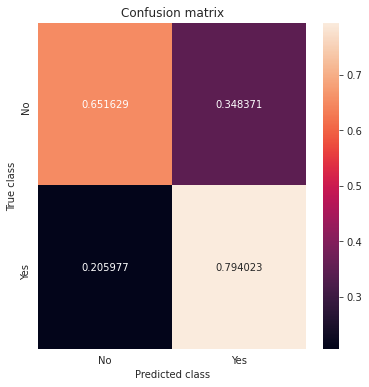

              precision    recall  f1-score   support

           0       0.73      0.65      0.69       798
           1       0.73      0.79      0.76       937

    accuracy                           0.73      1735
   macro avg       0.73      0.72      0.72      1735
weighted avg       0.73      0.73      0.73      1735



In [26]:
#Logistic Regression Model FOR T_F Indicator has accuracy of 73%

TFB = LogisticRegression()
TFB.fit(X_train,TF_train)
TFB_pred = TFB.predict(X_test)
matrix = confusion_matrix(TF_test, TFB_pred, normalize = 'true')


draw_matrix(matrix, LABELS)
print(classification_report(TF_test, TFB_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



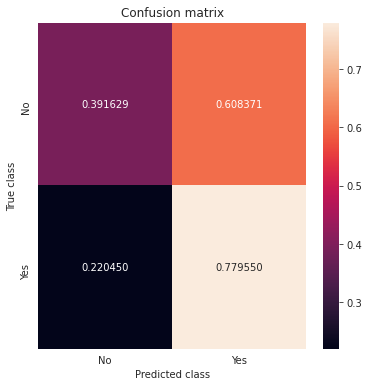

              precision    recall  f1-score   support

           0       0.53      0.39      0.45       669
           1       0.67      0.78      0.72      1066

    accuracy                           0.63      1735
   macro avg       0.60      0.59      0.59      1735
weighted avg       0.62      0.63      0.62      1735



In [27]:
#Logistic Regression Model FOR J_P Indicator has accuracy of 63%

JPB = LogisticRegression()
JPB.fit(X_train,JP_train)
JPB_pred = JPB.predict(X_test)
matrix = confusion_matrix(JP_test, JPB_pred, normalize = 'true')


draw_matrix(matrix, LABELS)
print(classification_report(JP_test, JPB_pred))

**Analysis:** Logistic Regression Classification Report for all Indicator types

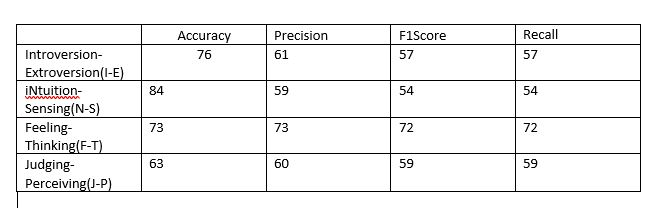





 









**Decision Tree**

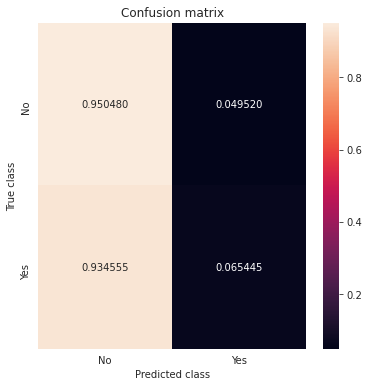

              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1353
           1       0.27      0.07      0.11       382

    accuracy                           0.76      1735
   macro avg       0.53      0.51      0.48      1735
weighted avg       0.67      0.76      0.69      1735



In [31]:
#DecisionTree Model FOR I_E Indicator has accuracy of 76%

IEB = DecisionTreeClassifier(criterion='gini', max_depth= 8 ,random_state=999)
IEB.fit(X_train,IE_train)
IEB_pred = IEB.predict(X_test)
matrix = confusion_matrix(IE_test, IEB_pred, normalize = 'true')


draw_matrix(matrix, LABELS)
print(classification_report(IE_test, IEB_pred))

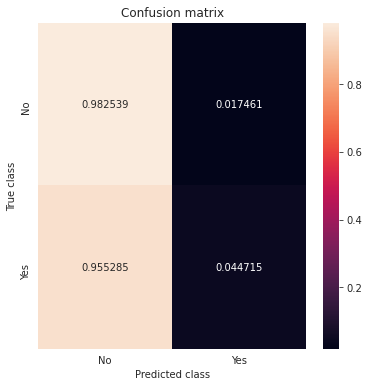

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1489
           1       0.30      0.04      0.08       246

    accuracy                           0.85      1735
   macro avg       0.58      0.51      0.50      1735
weighted avg       0.78      0.85      0.80      1735



In [30]:
#DecisionTree Model FOR N_S Indicator has accuracy of 85%

NSB = DecisionTreeClassifier(criterion='gini', max_depth= 8 ,random_state=999)
NSB.fit(X_train,NS_train)
NSB_pred = NSB.predict(X_test)
matrix = confusion_matrix(NS_test, NSB_pred, normalize = 'true')


draw_matrix(matrix, LABELS)
print(classification_report(NS_test, NSB_pred))

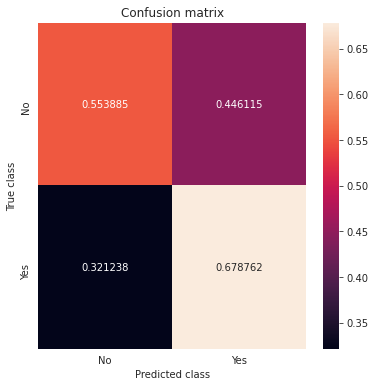

              precision    recall  f1-score   support

           0       0.59      0.55      0.57       798
           1       0.64      0.68      0.66       937

    accuracy                           0.62      1735
   macro avg       0.62      0.62      0.62      1735
weighted avg       0.62      0.62      0.62      1735



In [29]:
#DecisionTree Model FOR T_F Indicator has accuracy of 62%

TFB = DecisionTreeClassifier(criterion='gini', max_depth= 8 ,random_state=999)
TFB.fit(X_train,TF_train)
TFB_pred = TFB.predict(X_test)
matrix = confusion_matrix(TF_test, TFB_pred, normalize = 'true')


draw_matrix(matrix, LABELS)
print(classification_report(TF_test, TFB_pred))

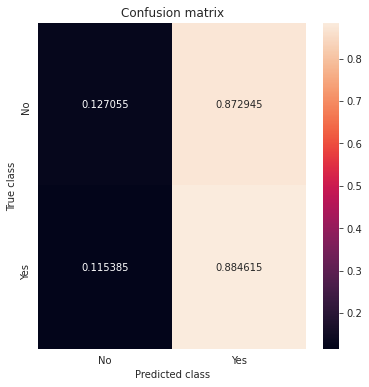

              precision    recall  f1-score   support

           0       0.41      0.13      0.19       669
           1       0.62      0.88      0.73      1066

    accuracy                           0.59      1735
   macro avg       0.51      0.51      0.46      1735
weighted avg       0.54      0.59      0.52      1735



In [28]:
#DecisionTree  Model FOR J_P Indicator has accuracy of 59%

JPB = DecisionTreeClassifier(criterion='gini', max_depth= 8 ,random_state=999)
JPB.fit(X_train,JP_train)
JPB_pred = JPB.predict(X_test)
matrix = confusion_matrix(JP_test, JPB_pred, normalize = 'true')


draw_matrix(matrix, LABELS)
print(classification_report(JP_test, JPB_pred))

**Analysis:-** Decision Tree Classification Report for all Type indicators




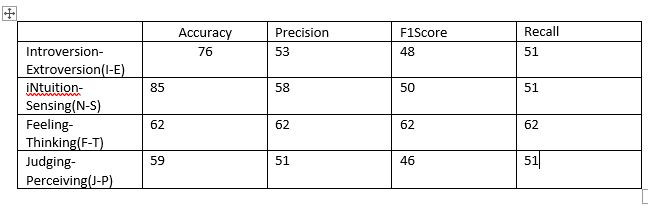

**MultiNomial NB**

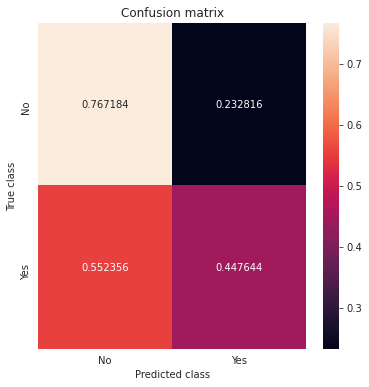

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1353
           1       0.35      0.45      0.39       382

    accuracy                           0.70      1735
   macro avg       0.59      0.61      0.60      1735
weighted avg       0.73      0.70      0.71      1735



In [32]:
#MultinomialNB Model FOR I_E Indicator has accuracy of 70%

IEB = MultinomialNB(alpha = 1)
IEB.fit(X_train,IE_train)
IEB_pred = IEB.predict(X_test)
matrix = confusion_matrix(IE_test, IEB_pred, normalize = 'true')


draw_matrix(matrix, LABELS)
print(classification_report(IE_test, IEB_pred))

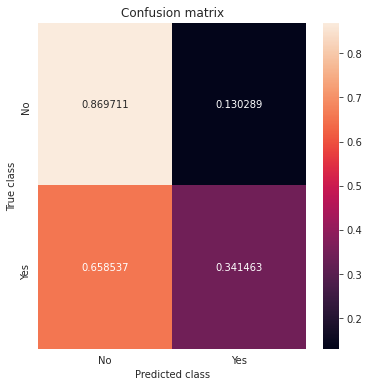

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1489
           1       0.30      0.34      0.32       246

    accuracy                           0.79      1735
   macro avg       0.60      0.61      0.60      1735
weighted avg       0.81      0.79      0.80      1735



In [33]:
#MultinomialNB Model FOR N_S Indicator has accuracy of 79%

NSB = MultinomialNB(alpha = 1)
NSB.fit(X_train,NS_train)
NSB_pred = NSB.predict(X_test)
matrix = confusion_matrix(NS_test, NSB_pred, normalize = 'true')


draw_matrix(matrix, LABELS)
print(classification_report(NS_test, NSB_pred))

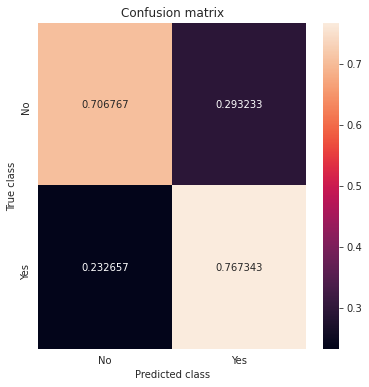

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       798
           1       0.75      0.77      0.76       937

    accuracy                           0.74      1735
   macro avg       0.74      0.74      0.74      1735
weighted avg       0.74      0.74      0.74      1735



In [34]:
#MultinomialNB Model FOR T_F Indicator has accuracy of 74%

TFB = MultinomialNB(alpha = 1)
TFB.fit(X_train,TF_train)
TFB_pred = TFB.predict(X_test)
matrix = confusion_matrix(TF_test, TFB_pred, normalize = 'true')


draw_matrix(matrix, LABELS)
print(classification_report(TF_test, TFB_pred))

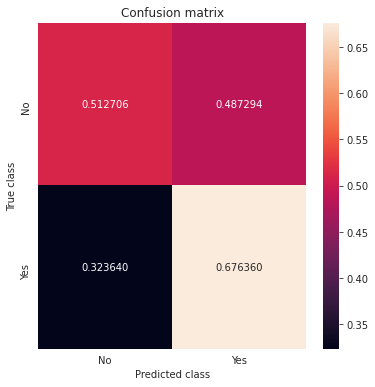

              precision    recall  f1-score   support

           0       0.50      0.51      0.51       669
           1       0.69      0.68      0.68      1066

    accuracy                           0.61      1735
   macro avg       0.59      0.59      0.59      1735
weighted avg       0.62      0.61      0.61      1735



In [35]:
#MultinomialNB  Model FOR J_P Indicator has accuracy of 61%

JPB = MultinomialNB(alpha = 1)
JPB.fit(X_train,JP_train)
JPB_pred = JPB.predict(X_test)
matrix = confusion_matrix(JP_test, JPB_pred, normalize = 'true')


draw_matrix(matrix, LABELS)
print(classification_report(JP_test, JPB_pred))

**Analysis:-** MultiNomialNB ClassificationReport for  type indicators
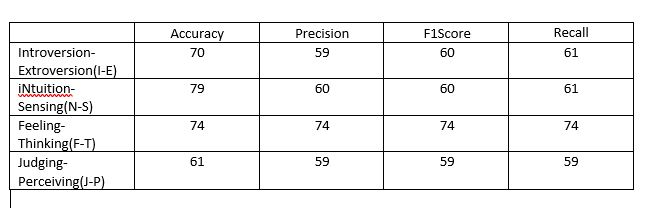



**RandomForestClassifier** 

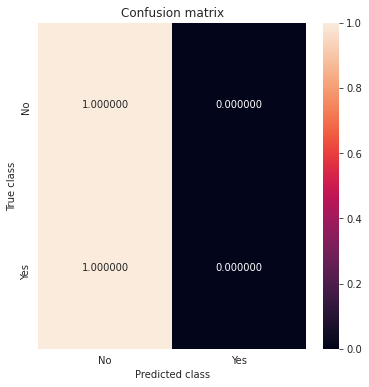

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1353
           1       0.00      0.00      0.00       382

    accuracy                           0.78      1735
   macro avg       0.39      0.50      0.44      1735
weighted avg       0.61      0.78      0.68      1735



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [38]:
#RandomForestClassifier Model FOR I_E Indicator has accuracy of 78%

IEB = RandomForestClassifier(n_estimators=100, random_state=0)
IEB.fit(X_train,IE_train)
IEB_pred = IEB.predict(X_test)
matrix = confusion_matrix(IE_test, IEB_pred, normalize = 'true')


draw_matrix(matrix, LABELS)
print(classification_report(IE_test, IEB_pred))

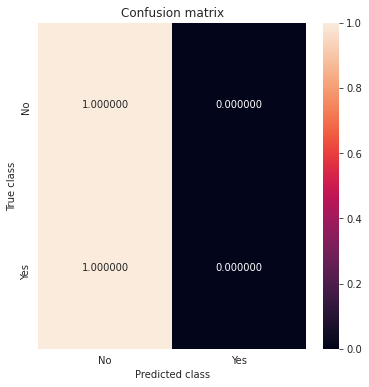

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1489
           1       0.00      0.00      0.00       246

    accuracy                           0.86      1735
   macro avg       0.43      0.50      0.46      1735
weighted avg       0.74      0.86      0.79      1735



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [39]:
#RandomForestClassifier Model FOR N_S Indicator has accuracy of 86%

NSB = RandomForestClassifier(n_estimators=100, random_state=0)
NSB.fit(X_train,NS_train)
NSB_pred = NSB.predict(X_test)
matrix = confusion_matrix(NS_test, NSB_pred, normalize = 'true')


draw_matrix(matrix, LABELS)
print(classification_report(NS_test, NSB_pred))

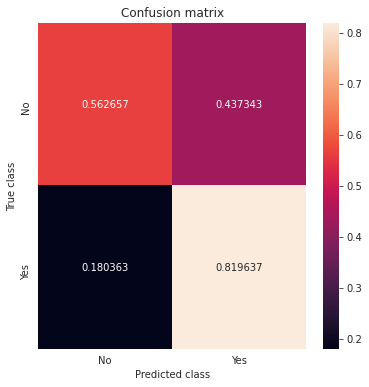

              precision    recall  f1-score   support

           0       0.73      0.56      0.63       798
           1       0.69      0.82      0.75       937

    accuracy                           0.70      1735
   macro avg       0.71      0.69      0.69      1735
weighted avg       0.71      0.70      0.70      1735



In [41]:
#RandomForestClassifier Model FOR T_F Indicator has accuracy of 70%

TFB = RandomForestClassifier(n_estimators=100, random_state=0)
TFB.fit(X_train,TF_train)
TFB_pred = TFB.predict(X_test)
matrix = confusion_matrix(TF_test, TFB_pred, normalize = 'true')


draw_matrix(matrix, LABELS)
print(classification_report(TF_test, TFB_pred))

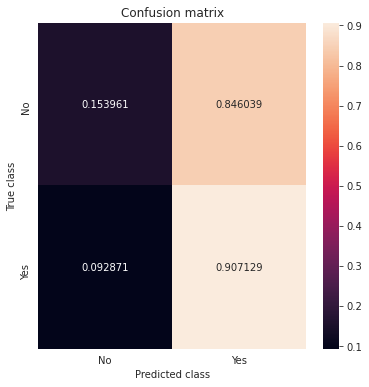

              precision    recall  f1-score   support

           0       0.51      0.15      0.24       669
           1       0.63      0.91      0.74      1066

    accuracy                           0.62      1735
   macro avg       0.57      0.53      0.49      1735
weighted avg       0.58      0.62      0.55      1735



In [37]:
#RandomForestClassifier  Model FOR J_P Indicator has accuracy of 62%

JPB = RandomForestClassifier(n_estimators=100, random_state=0)
JPB.fit(X_train,JP_train)
JPB_pred = JPB.predict(X_test)
matrix = confusion_matrix(JP_test, JPB_pred, normalize = 'true')


draw_matrix(matrix, LABELS)
print(classification_report(JP_test, JPB_pred))

**Analysis:-** RandomForest Classifier Classification report for the Type indicators

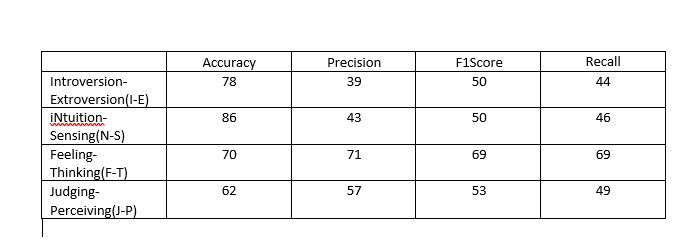

**XGBoost Classifier:-**

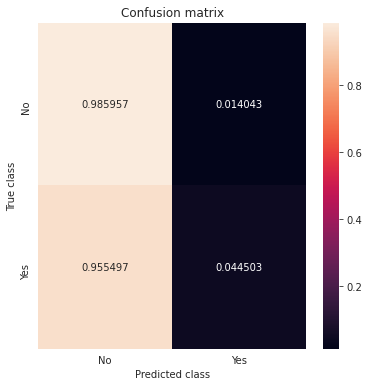

              precision    recall  f1-score   support

           0       0.79      0.99      0.87      1353
           1       0.47      0.04      0.08       382

    accuracy                           0.78      1735
   macro avg       0.63      0.52      0.48      1735
weighted avg       0.72      0.78      0.70      1735



In [42]:
#XGBClassifier Model FOR I_E Indicator has accuracy of 78%

IEB = XGBClassifier(max_depth = 2, learning_rate = 0.2, n_estimators = 200, nthread = 8 )
IEB.fit(X_train,IE_train)
IEB_pred = IEB.predict(X_test)
matrix = confusion_matrix(IE_test, IEB_pred, normalize = 'true')


draw_matrix(matrix, LABELS)
print(classification_report(IE_test, IEB_pred))

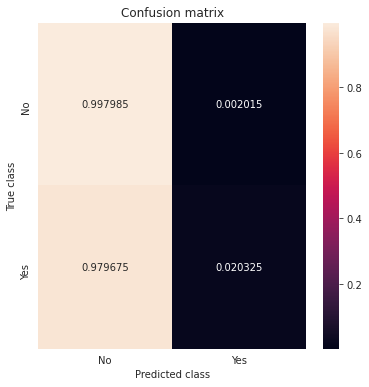

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1489
           1       0.62      0.02      0.04       246

    accuracy                           0.86      1735
   macro avg       0.74      0.51      0.48      1735
weighted avg       0.83      0.86      0.80      1735



In [43]:
#XGBClassifier Model FOR N_S Indicator has accuracy of 86%

NSB = XGBClassifier(max_depth = 2, learning_rate = 0.2, n_estimators = 200, nthread = 8 )
NSB.fit(X_train,NS_train)
NSB_pred = NSB.predict(X_test)
matrix = confusion_matrix(NS_test, NSB_pred, normalize = 'true')


draw_matrix(matrix, LABELS)
print(classification_report(NS_test, NSB_pred))

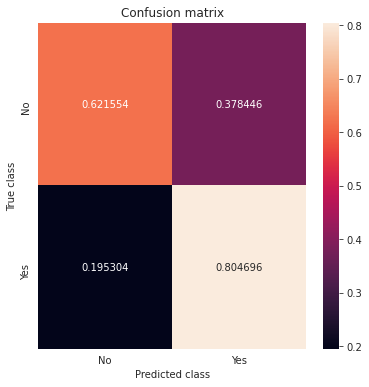

              precision    recall  f1-score   support

           0       0.73      0.62      0.67       798
           1       0.71      0.80      0.76       937

    accuracy                           0.72      1735
   macro avg       0.72      0.71      0.71      1735
weighted avg       0.72      0.72      0.72      1735



In [44]:
#XGBClassifier Model FOR T_F Indicator has accuracy of 72%

TFB = XGBClassifier(max_depth = 2, learning_rate = 0.2, n_estimators = 200, nthread = 8 )
TFB.fit(X_train,TF_train)
TFB_pred = TFB.predict(X_test)
matrix = confusion_matrix(TF_test, TFB_pred, normalize = 'true')


draw_matrix(matrix, LABELS)
print(classification_report(TF_test, TFB_pred))

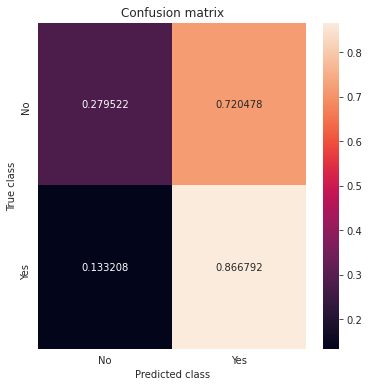

              precision    recall  f1-score   support

           0       0.57      0.28      0.37       669
           1       0.66      0.87      0.75      1066

    accuracy                           0.64      1735
   macro avg       0.61      0.57      0.56      1735
weighted avg       0.62      0.64      0.60      1735



In [45]:
#XGBClassifier  Model FOR J_P Indicator has accuracy of 64%

JPB = XGBClassifier(max_depth = 2, learning_rate = 0.2, n_estimators = 200, nthread = 8 )
JPB.fit(X_train,JP_train)
JPB_pred = JPB.predict(X_test)
matrix = confusion_matrix(JP_test, JPB_pred, normalize = 'true')


draw_matrix(matrix, LABELS)
print(classification_report(JP_test, JPB_pred))

**Analysis:-** XGBoost Classification Report for all type indicators
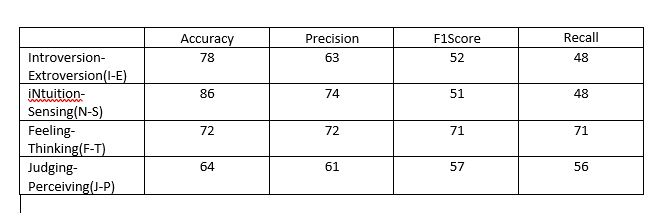


* We can understand that the performance XGBoost is better than the performance of other models. 
*Lets Use XGBoost as baseline method and I have already parameter tuning for the XGboost, Only options we had now is to resample dataset as it highly imbalanced when we verified earlier

**Resampling Data**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



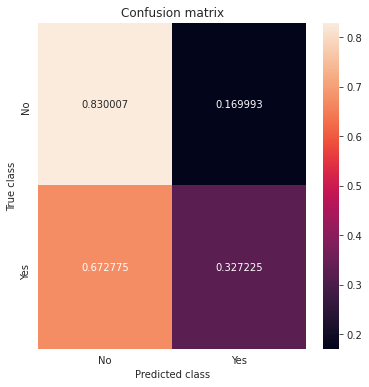

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1353
           1       0.35      0.33      0.34       382

    accuracy                           0.72      1735
   macro avg       0.58      0.58      0.58      1735
weighted avg       0.71      0.72      0.72      1735



In [46]:
#Oversampling 

smt = SMOTE()
X_Resampled,IE_Resampled = smt.fit_sample(X_train,IE_train)

IEB = XGBClassifier(max_depth = 2, learning_rate = 0.2, n_estimators = 200, nthread = 8  )
IEB.fit(X_Resampled,IE_Resampled)
IEB_pred = IEB.predict(X_test)
matrix = confusion_matrix(IE_test, IEB_pred, normalize = 'true')
draw_matrix(matrix, LABELS)
print(classification_report(IE_test, IEB_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



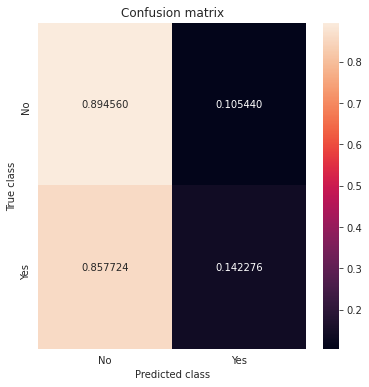

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1489
           1       0.18      0.14      0.16       246

    accuracy                           0.79      1735
   macro avg       0.52      0.52      0.52      1735
weighted avg       0.77      0.79      0.78      1735



In [47]:
smt = SMOTE()
X_Resampled,NS_Resampled = smt.fit_sample(X_train,NS_train)

NSB = XGBClassifier(max_depth = 2, learning_rate = 0.2, n_estimators = 200, nthread = 8  )
NSB.fit(X_Resampled,NS_Resampled)
NSB_pred = NSB.predict(X_test)
matrix = confusion_matrix(NS_test, NSB_pred, normalize = 'true')
draw_matrix(matrix, LABELS)
print(classification_report(NS_test, NSB_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



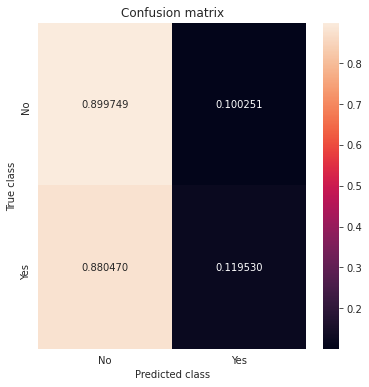

              precision    recall  f1-score   support

           0       0.47      0.90      0.61       798
           1       0.58      0.12      0.20       937

    accuracy                           0.48      1735
   macro avg       0.52      0.51      0.41      1735
weighted avg       0.53      0.48      0.39      1735



In [49]:
smt = SMOTE()
X_Resampled,TF_Resampled = smt.fit_sample(X_train,TF_train)

TFB = XGBClassifier(max_depth = 2, learning_rate = 0.2, n_estimators = 200, nthread = 8  )
TFB.fit(X_Resampled,TF_Resampled)
TFB_pred = NSB.predict(X_test)
matrix = confusion_matrix(TF_test, TFB_pred, normalize = 'true')
draw_matrix(matrix, LABELS)
print(classification_report(TF_test, TFB_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



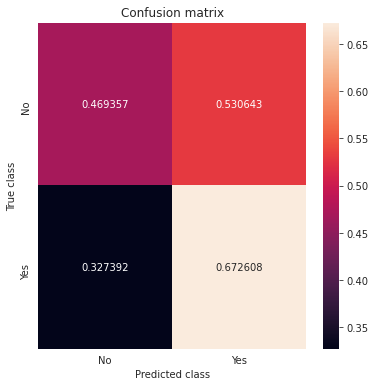

              precision    recall  f1-score   support

           0       0.47      0.47      0.47       669
           1       0.67      0.67      0.67      1066

    accuracy                           0.59      1735
   macro avg       0.57      0.57      0.57      1735
weighted avg       0.59      0.59      0.59      1735



In [50]:
smt = SMOTE()
X_Resampled,JP_Resampled = smt.fit_sample(X_train,JP_train)

JPB = XGBClassifier(max_depth = 2, learning_rate = 0.2, n_estimators = 200, nthread = 8  )
JPB.fit(X_Resampled,JP_Resampled)
JPB_pred = JPB.predict(X_test)
matrix = confusion_matrix(JP_test, JPB_pred, normalize = 'true')
draw_matrix(matrix, LABELS)
print(classification_report(JP_test, JPB_pred))

**Analysis:-** Oversampling data classification Report all Type Indicators

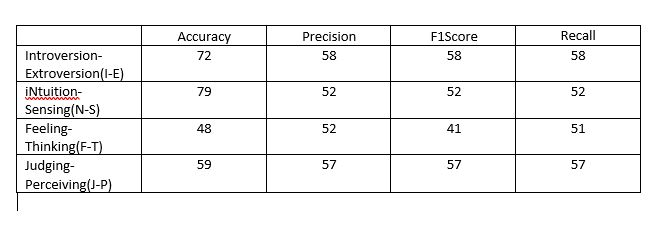

Surprisingly Oversample haven't yielded any good results compared to the data without oversampling. Let's try undersampling to check model behavior

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



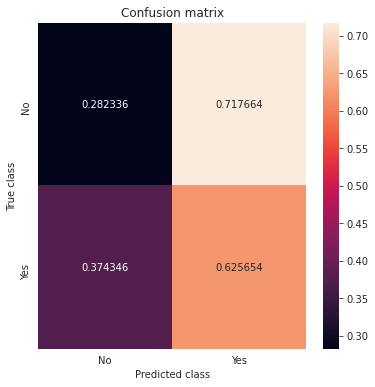

              precision    recall  f1-score   support

           0       0.73      0.28      0.41      1353
           1       0.20      0.63      0.30       382

    accuracy                           0.36      1735
   macro avg       0.46      0.45      0.35      1735
weighted avg       0.61      0.36      0.38      1735



In [51]:
#Undersampling 
Nr = NearMiss()
X_Resampled,IE_Resampled = Nr.fit_sample(X_train,IE_train)

IEB = XGBClassifier(max_depth = 2, learning_rate = 0.2, n_estimators = 200, nthread = 8  )
IEB.fit(X_Resampled,IE_Resampled)
IEB_pred = IEB.predict(X_test)
matrix = confusion_matrix(IE_test, IEB_pred, normalize = 'true')
draw_matrix(matrix, LABELS)
print(classification_report(IE_test, IEB_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



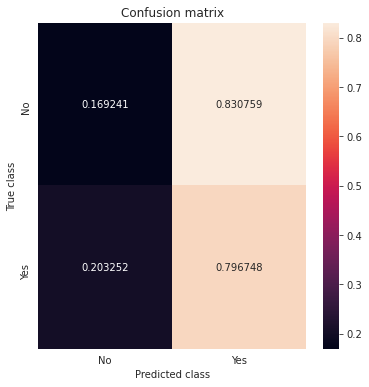

              precision    recall  f1-score   support

           0       0.83      0.17      0.28      1489
           1       0.14      0.80      0.23       246

    accuracy                           0.26      1735
   macro avg       0.49      0.48      0.26      1735
weighted avg       0.74      0.26      0.27      1735



In [52]:
#Undersampling 
Nr = NearMiss()

X_Resampled,NS_Resampled = Nr.fit_sample(X_train,NS_train)

NSB = XGBClassifier(max_depth = 2, learning_rate = 0.2, n_estimators = 200, nthread = 8  )
NSB.fit(X_Resampled,NS_Resampled)
NSB_pred = NSB.predict(X_test)
matrix = confusion_matrix(NS_test, NSB_pred, normalize = 'true')
draw_matrix(matrix, LABELS)
print(classification_report(NS_test, NSB_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



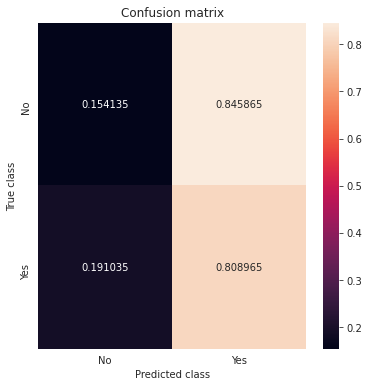

              precision    recall  f1-score   support

           0       0.41      0.15      0.22       798
           1       0.53      0.81      0.64       937

    accuracy                           0.51      1735
   macro avg       0.47      0.48      0.43      1735
weighted avg       0.47      0.51      0.45      1735



In [53]:
#Undersampling 
Nr = NearMiss()
X_Resampled,TF_Resampled = Nr.fit_sample(X_train,TF_train)

TFB = XGBClassifier(max_depth = 2, learning_rate = 0.2, n_estimators = 200, nthread = 8  )
TFB.fit(X_Resampled,TF_Resampled)
TFB_pred = NSB.predict(X_test)
matrix = confusion_matrix(TF_test, TFB_pred, normalize = 'true')
draw_matrix(matrix, LABELS)
print(classification_report(TF_test, TFB_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



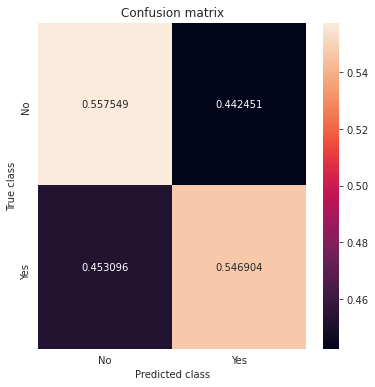

              precision    recall  f1-score   support

           0       0.44      0.56      0.49       669
           1       0.66      0.55      0.60      1066

    accuracy                           0.55      1735
   macro avg       0.55      0.55      0.54      1735
weighted avg       0.58      0.55      0.56      1735



In [54]:
#Undersampling 
Nr = NearMiss()
X_Resampled,JP_Resampled = Nr.fit_sample(X_train,JP_train)
JPB = XGBClassifier(max_depth = 2, learning_rate = 0.2, n_estimators = 200, nthread = 8  )
JPB.fit(X_Resampled,JP_Resampled)
JPB_pred = JPB.predict(X_test)
matrix = confusion_matrix(JP_test, JPB_pred, normalize = 'true')
draw_matrix(matrix, LABELS)
print(classification_report(JP_test, JPB_pred))


**Analysis:-** Under sampling performance is poor,below is the classification 

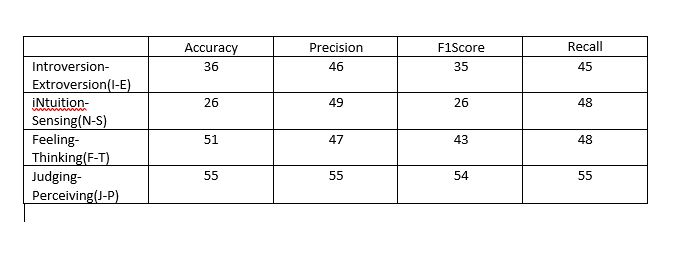

**Summary**:- 


1.   Overall the performance of the XGBoost classifier is good when compared to other algorithms and even sampling has't improved the performance.
2.   At this point, the algorithm is good with the overall Accuracy of the algorithm is 78, 86, 72, 64(Introversion-Extroversion(I-E), iNtuition-Sensing(N-S), Feeling-Thinking(F-T) and Judging-Perceiving(J-P)) Indicators




**Future work:-**
1. Overall aim of this project is to come up with a model that performs better in predicting the individual posts on the social media, Even though dataset is highly imbalanced, XGBoost model did better to give that accuracy.
2. More work has to be done to get proper data and need to comeup with better preprocessing techniques to analyze posts and do more feature engineering to achieve high performance model.
3. Build an application that will be very useful where it predicts the individual personality from there posts, Mainly which give a flag or alerts to the family of individuals when someone puts highly depressed posts on thier social media accounts.(Now social media is the place where everyone spends lots of time and does often everyone express thier feelings through the social media posts).